# 서포트 벡터 머신 SVM

In [1]:
# 서포트 벡터 머신은 매우 강력하고 선형,비선형 분류, 회귀, 이상치 탐색에도 사용할 수 있는 다목적 머신러닝 모델이다.
# SVM은 특히 복잡한 분류문제에 잘 들어맞으며 작거나 중간크기의 데이터 셋에 적합하다.

# 5-1 선형 SVM

In [2]:
# 서포트 벡터 머신은 선형 모델에서 margin이 가장 많이 남는 것을 목적으로 하여 찾는다.
# 스케일 되지 않으면 margin값에 영향을 많이 준다. 스케일링 필수
# margin classification이 너무 하드하게 작용하면(정확하게 선형 분류를 시도하여 나누고 그 안의 margin에 그 어떤 데이터가 없게 끔) 이상치가 존재할 경우 일반화가 어렵다
# 따라서 soft margin classification이 필요하다. 얼마나 soft한가는 하이퍼파라미터 C를 이용하여 조절할 수 있으며 값이 낮을수록 margin에 많은 데이터를 포함시킨다.(C가 낮으면 규제 강)

In [4]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
iris = datasets.load_iris()
X = iris['data'][:,2:4]
y = (iris['target'] == 2).astype(np.float64)

pipe = Pipeline([
    ('scaler',StandardScaler()),
    ('linear_scv',LinearSVC(C=1,loss='hinge'))
])

In [6]:
pipe.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_scv', LinearSVC(C=1, loss='hinge'))])

In [7]:
pipe.predict([[5.5, 1.7]])

array([1.])

# 5-2 비선형 SVM

In [8]:
# 선형 SVM 분류기가 효율적이고 많은 경우에 잘 작동하지만, 선형적으로 분류할 수 없는 데이터셋이 많다.
# 이럴경우 다항특성을 추가해 구분하게 된다.

In [62]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X,y = make_moons(n_samples=100,noise = 0.15)
pipe = Pipeline([
    ('poly_features',PolynomialFeatures(degree=3)),
    ('scaler',StandardScaler()),
    ('svm_clf',LinearSVC(C=10,loss='hinge'))
])

pipe.fit(X,y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

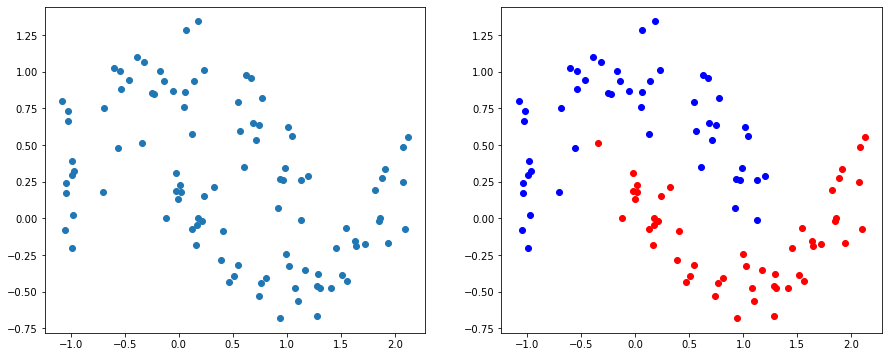

In [82]:
True1 = []
False1 = []
for i,v in enumerate(y):
    if v == 1:
        True1.append(i)
    elif v == 0:
        False1.append(i)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 6)) 
plt.subplot(121).scatter(X[:,0],X[:,1])
for i in True1:
    plt.subplot(122).scatter(X[i,0],X[i,1],c = 'r')
for i in False1:
    plt.subplot(122).scatter(X[i,0],X[i,1],c = 'b')
plt.show()

## 5-2-1 다항식 커널

In [86]:
# 다항식 트성을 추가하는 것은 간단하고 모든 알고리즘에서 잘 작동한다
# 하지만 낮은 차수의 다항식은 매우 복잡한 데이터셋을 잘 표현하지 못하고 높은 차수의 다항식은 굉장히 많은 특성을 추가해 느리게한다
# 이럴 때 커널 트릭이라는 수학적 트릭을 사용하게 된다
# 커널 트릭은 실제로는 특성을 추가하지 않으면서 다항식 특성을 추가한 것과 같은 결과를 얻을 수 있다.

In [93]:
# 이 코드는 3차 다항식 커널을 사용해 SVM 분류기를 훈련시킨다. 
from sklearn.svm import SVC
poly_kernel_svm = Pipeline([
    ('scaler',StandardScaler()),
    ('svm_clf',SVC(kernel='poly',degree=3,coef0=1,C=5))
    ])
poly_kernel_svm.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [94]:
poly_kernel_svm.score(X,y)

0.99

## 5-2-2 유사도 특성

In [95]:
# 비선형 특성을 또 다른 기법은 각 샘플이 특정 랜드마크와 얼마나 닮았는지 측정하는 유사도 함수로 계산한 특성을 추가하는 것이다.
# 